In [39]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3338f1eb6e0659d3b585d14c3d0e696f&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":51.01,"feels_like":47.62,"temp_min":48,"temp_max":54,"pressure":1017,"humidity":76},"visibility":10000,"wind":{"speed":3.42,"deg":245},"clouds":{"all":1},"dt":1602739626,"sys":{"type":1,"id":3486,"country":"US","sunrise":1602759446,"sunset":1602799321},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 51.01,
  'feels_like': 47.62,
  'temp_min': 48,
  'temp_max': 54,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 3.42, 'deg': 245},
 'clouds': {'all': 1},
 'dt': 1602739626,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1602759446,
  'sunset': 1602799321},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 51.01,
  'feels_like': 47.62,
  'temp_min': 48,
  'temp_max': 54,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 3.42, 'deg': 245},
 'clouds': {'all': 1},
 'dt': 1602739626,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1602759446,
  'sunset': 1602799321},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 54 76 1 3.42


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-10-15 05:27:06'

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | biak
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | kudahuvadhoo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | nishihara
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | laiagam
City not found. Skipping...
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | victoria
Processing

Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | tuktoyaktuk
Processing Record 43 of Set 4 | shihezi
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | marysville
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | miyako
Processing Record 48 of Set 4 | dobroteasa
Processing Record 49 of Set 4 | saquarema
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | parabel
Processing Record 4 of Set 5 | katangli
Processing Record 5 of Set 5 | belaya gora
Processing Record 6 of Set 5 | barrow
Processing Record 7 of Set 5 | sorvag
City not found. Skipping...
Processing Record 8 of Set 5 | hammerfest
Processing Record 9 of Set 5 | husavik
Processing Record 10 of Set 5 | hilo
Processing Record 11 of Set 5 | banjarma

Processing Record 28 of Set 8 | xuddur
Processing Record 29 of Set 8 | itarema
Processing Record 30 of Set 8 | longhua
Processing Record 31 of Set 8 | clyde river
Processing Record 32 of Set 8 | saint-francois
Processing Record 33 of Set 8 | atkarsk
Processing Record 34 of Set 8 | liwale
Processing Record 35 of Set 8 | iquitos
Processing Record 36 of Set 8 | amahai
Processing Record 37 of Set 8 | kholodnyy
Processing Record 38 of Set 8 | upernavik
Processing Record 39 of Set 8 | huarmey
Processing Record 40 of Set 8 | todos santos
Processing Record 41 of Set 8 | krasnogorskiy
Processing Record 42 of Set 8 | zaterechnyy
Processing Record 43 of Set 8 | longyearbyen
Processing Record 44 of Set 8 | jomalig
City not found. Skipping...
Processing Record 45 of Set 8 | ust-kulom
Processing Record 46 of Set 8 | mangrol
Processing Record 47 of Set 8 | kita
Processing Record 48 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 49 of Set 8 | san patricio
Processing Record 50 of S

Processing Record 15 of Set 12 | quthing
Processing Record 16 of Set 12 | beyneu
Processing Record 17 of Set 12 | puerto narino
Processing Record 18 of Set 12 | penticton
Processing Record 19 of Set 12 | thohoyandou
Processing Record 20 of Set 12 | valparaiso
Processing Record 21 of Set 12 | barawe
City not found. Skipping...
Processing Record 22 of Set 12 | mineral wells
Processing Record 23 of Set 12 | visimo-utkinsk
City not found. Skipping...
Processing Record 24 of Set 12 | amuntai
Processing Record 25 of Set 12 | baghdad
Processing Record 26 of Set 12 | jinka
Processing Record 27 of Set 12 | tias
Processing Record 28 of Set 12 | okitipupa
Processing Record 29 of Set 12 | iwanai
Processing Record 30 of Set 12 | hakvik
City not found. Skipping...
Processing Record 31 of Set 12 | chimbarongo
Processing Record 32 of Set 12 | dharchula
Processing Record 33 of Set 12 | gondanglegi
Processing Record 34 of Set 12 | lamu
Processing Record 35 of Set 12 | teknaf
Processing Record 36 of Set 

In [20]:
len(city_data)

559

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,50.00,64,72,3.36,US,2020-10-15 05:27:12
1,Dikson,73.51,80.55,29.25,92,97,21.12,RU,2020-10-15 05:27:12
2,Souillac,-20.52,57.52,78.80,65,40,10.29,MU,2020-10-15 05:27:13
3,Aklavik,68.22,-135.01,17.60,78,90,3.36,CA,2020-10-15 05:27:13
4,New Norfolk,-42.78,147.06,57.99,71,88,1.99,AU,2020-10-15 05:27:13
5,Karratha,-20.74,116.85,95.32,23,0,17.47,AU,2020-10-15 05:27:13
6,Cape Town,-33.93,18.42,59.00,93,75,16.11,ZA,2020-10-15 05:22:30
7,Guerrero Negro,27.98,-114.06,76.68,48,100,1.74,MX,2020-10-15 05:27:16
8,Biak,-0.91,122.88,84.54,69,4,5.77,ID,2020-10-15 05:27:16
9,Zhigansk,66.77,123.37,17.58,91,10,4.59,RU,2020-10-15 05:27:16


In [22]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-10-15 05:27:12,42.60,-73.97,50.00,64,72,3.36
1,Dikson,RU,2020-10-15 05:27:12,73.51,80.55,29.25,92,97,21.12
2,Souillac,MU,2020-10-15 05:27:13,-20.52,57.52,78.80,65,40,10.29
3,Aklavik,CA,2020-10-15 05:27:13,68.22,-135.01,17.60,78,90,3.36
4,New Norfolk,AU,2020-10-15 05:27:13,-42.78,147.06,57.99,71,88,1.99
...,...,...,...,...,...,...,...,...,...
554,Umm Kaddadah,SD,2020-10-15 05:25:07,13.60,26.69,82.69,32,22,6.26
555,Rio Grande,BR,2020-10-15 05:30:06,-32.03,-52.10,56.53,90,93,5.64
556,Coolum Beach,AU,2020-10-15 05:30:06,-26.53,153.10,75.99,60,23,5.01
557,Kinsale,IE,2020-10-15 05:30:07,51.71,-8.53,44.60,93,40,9.17


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1602739808.135398

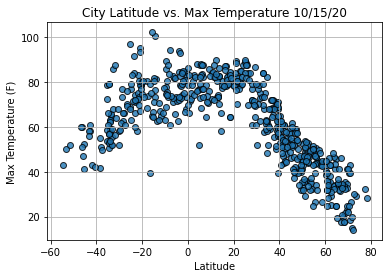

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

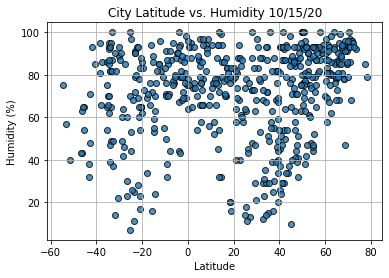

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

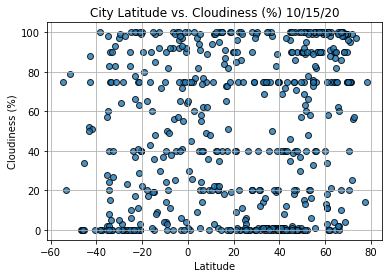

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

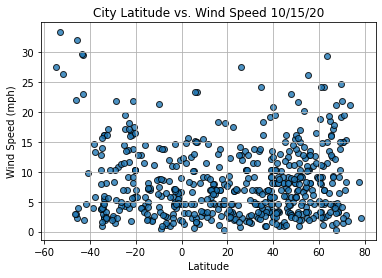

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Souillac,MU,2020-10-15 05:27:13,-20.52,57.52,78.80,65,40,10.29
4,New Norfolk,AU,2020-10-15 05:27:13,-42.78,147.06,57.99,71,88,1.99
5,Karratha,AU,2020-10-15 05:27:13,-20.74,116.85,95.32,23,0,17.47
6,Cape Town,ZA,2020-10-15 05:22:30,-33.93,18.42,59.00,93,75,16.11
8,Biak,ID,2020-10-15 05:27:16,-0.91,122.88,84.54,69,4,5.77
...,...,...,...,...,...,...,...,...,...
543,Alice Springs,AU,2020-10-15 05:27:07,-23.70,133.88,91.40,11,0,4.70
547,Obera,AR,2020-10-15 05:30:01,-27.49,-55.12,60.78,85,98,3.67
548,Swellendam,ZA,2020-10-15 05:30:02,-34.02,20.44,53.60,93,15,4.70
555,Rio Grande,BR,2020-10-15 05:30:06,-32.03,-52.10,56.53,90,93,5.64


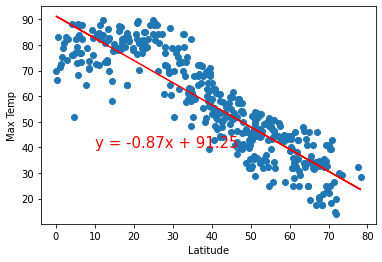

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

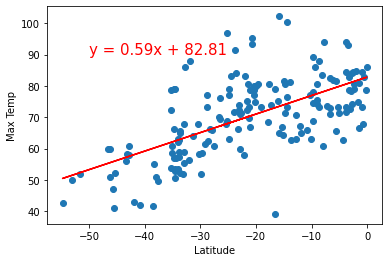

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

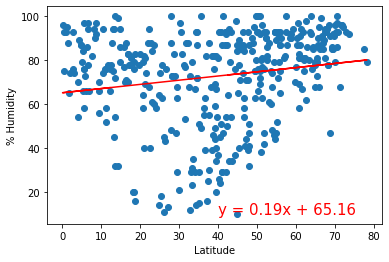

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

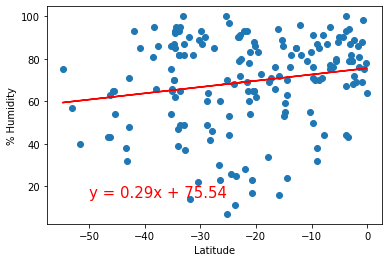

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

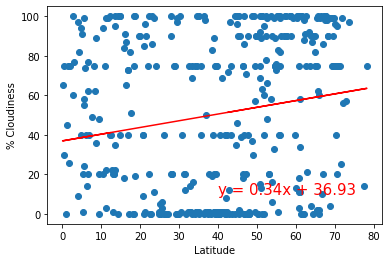

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

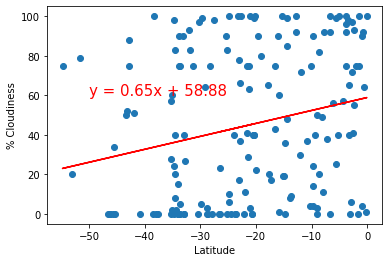

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

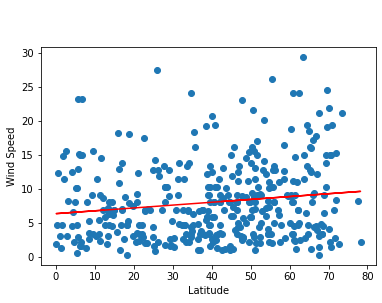

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

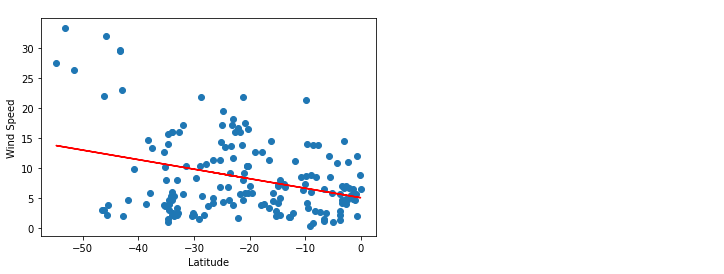

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (40,35))